In [131]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt
from geopy.geocoders import Nominatim 
import decimal
import folium
import shapely

In [148]:
usa = gpd.read_file('C:/Users/William/Documents/_UltraLearning/2020/9.2020/TornadoProject/MapFiles/USA/cb_2018_us_state_500k.shx')#gpd.datasets.get_path('naturalearth_lowres'))
counties = gpd.read_file('C:/Users/William/Documents/_UltraLearning/2020/9.2020/TornadoProject/MapFiles/cb_2018_us_county_5m/cb_2018_us_county_5m.shx')
tornadoes = pd.read_csv('C:/Users/William/Documents/_UltraLearning/2020/9.2020/TornadoProject/Data/tornadodata.csv').iloc[1588:]

In [149]:
# STATEFP for Arkansas is 05...?
tornadoes.head()

,Index,Segment,Date,Time,TimeZone,State1,State2,State3,Fujita,Fatalities,...,Damage,CropLoss,TouchdownLat,TouchdownLon,LiftoffLat,LiftoffLon,NumberOfStates,StateTor,TorNum,RecordStatus
1588,20090409.40.168479,State,4/9/2009,18:26:00,3,Oklahoma,NaN,NaN,2,0,...,$0.10,NaN,34.6192,-94.5619,34.6471,-94.4573,2,NaN,185,Unmodified
1589,20090409.40.168479,State,4/9/2009,18:34:00,3,Arkansas,NaN,NaN,1,0,...,$0.25,NaN,34.6471,-94.4573,34.6544,-94.3839,2,NaN,185,Unmodified
1590,20090409.40.154447,Summary,4/9/2009,19:01:00,3,Oklahoma,Arkansas,-,3,0,...,$5.05,NaN,34.0100,-94.4800,34.2029,-93.8752,2,NaN,187,Unmodified
1591,20090409.40.154447,State,4/9/2009,19:01:00,3,Oklahoma,NaN,NaN,2,0,...,$0.00,NaN,34.0100,-94.4800,34.0102,-94.4754,2,NaN,187,Unmodified
1592,20090409.40.154447,State,4/9/2009,19:03:00,3,Arkansas,NaN,NaN,3,0,...,$5.05,NaN,34.0102,-94.4754,34.2029,-93.8752,2,NaN,187,Unmodified


In [136]:
#usa.crs
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [154]:
touchdown_points = [shapely.geometry.Point((float(x),float(y))) for x,y in zip(tornadoes['TouchdownLon'],tornadoes['TouchdownLat'])]
liftoff_points = [shapely.geometry.Point((float(x),float(y))) for x,y in zip(tornadoes['LiftoffLon'],tornadoes['LiftoffLat'])]
tornado_td_gdf = gpd.GeoDataFrame(tornadoes,
                                  geometry = touchdown_points)
tornado_td_gdf.head()

,Index,Segment,Date,Time,TimeZone,State1,State2,State3,Fujita,Fatalities,...,CropLoss,TouchdownLat,TouchdownLon,LiftoffLat,LiftoffLon,NumberOfStates,StateTor,TorNum,RecordStatus,geometry
1588,20090409.40.168479,State,4/9/2009,18:26:00,3,Oklahoma,NaN,NaN,2,0,...,NaN,34.6192,-94.5619,34.6471,-94.4573,2,NaN,185,Unmodified,POINT (-94.56190 34.61920)
1589,20090409.40.168479,State,4/9/2009,18:34:00,3,Arkansas,NaN,NaN,1,0,...,NaN,34.6471,-94.4573,34.6544,-94.3839,2,NaN,185,Unmodified,POINT (-94.45730 34.64710)
1590,20090409.40.154447,Summary,4/9/2009,19:01:00,3,Oklahoma,Arkansas,-,3,0,...,NaN,34.0100,-94.4800,34.2029,-93.8752,2,NaN,187,Unmodified,POINT (-94.48000 34.01000)
1591,20090409.40.154447,State,4/9/2009,19:01:00,3,Oklahoma,NaN,NaN,2,0,...,NaN,34.0100,-94.4800,34.0102,-94.4754,2,NaN,187,Unmodified,POINT (-94.48000 34.01000)
1592,20090409.40.154447,State,4/9/2009,19:03:00,3,Arkansas,NaN,NaN,3,0,...,NaN,34.0102,-94.4754,34.2029,-93.8752,2,NaN,187,Unmodified,POINT (-94.47540 34.01020)


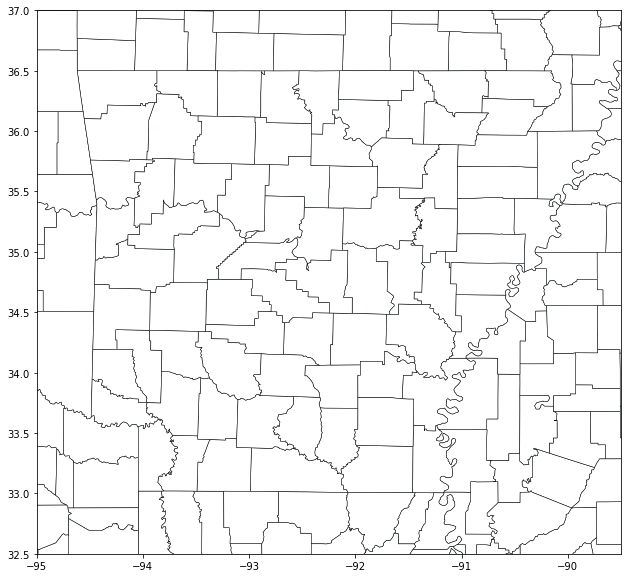

In [159]:
ax = counties.plot(figsize=(15,10))
ax.set_xlim(-95, -89.5)
ax.set_ylim(32.5, 37)
tornado_td_gdf.plot(ax=ax,color='red')
fig = counties.plot(ax=ax, color='white', linewidth=0.5, edgecolor='black').get_figure()
#fig.savefig("C:/Users/William/Documents/_UltraLearning/2020/9.2020/TornadoProject/Figures/Arkansas.png")

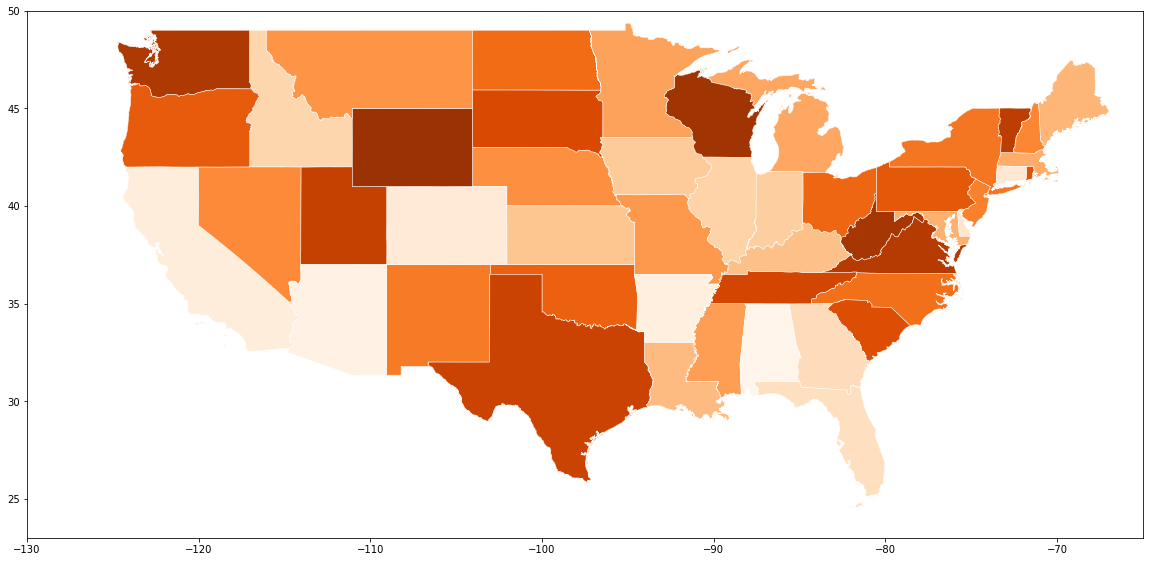

In [92]:
ax = usa.plot(cmap='Oranges',column='GEOID', linewidth=0.5, edgecolor='white', figsize=(20,15))
minx, miny, maxx, maxy = usa.total_bounds
ax.set_xlim(-130, -65)
ax.set_ylim(23, 50)
usa.add
fig = usa.plot(ax=ax, cmap='Oranges',column='GEOID', linewidth=0.5, edgecolor='white').get_figure()
#fig.savefig("C:/Users/William/Documents/_UltraLearning/2020/9.2020/TornadoProject/Figures/USMAP.png")

In [161]:
geolocator = Nominatim(user_agent="Rwanda Deluxe Insights")

In [7]:
# Accomplished with reference to 
# https://www.youtube.com/watch?v=wsSEKm-rU6U
# https://towardsdatascience.com/walkthrough-mapping-basics-with-bokeh-and-geopandas-in-python-43f40aa5b7e9
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
# https://stackoverflow.com/questions/46477018/zooming-and-saving-only-a-central-part-of-interest-in-a-matplotlib-geopandas-fig
# https://stackoverflow.com/questions/49591616/using-geopandas-to-plot-groups-of-points-on-a-map-produces-a-blank-image